In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/heart-failure-prediction/heart.csv


# Read Data

In [2]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Visualization

Have Heart Disease:  508
Not Have Heart Disease :  410


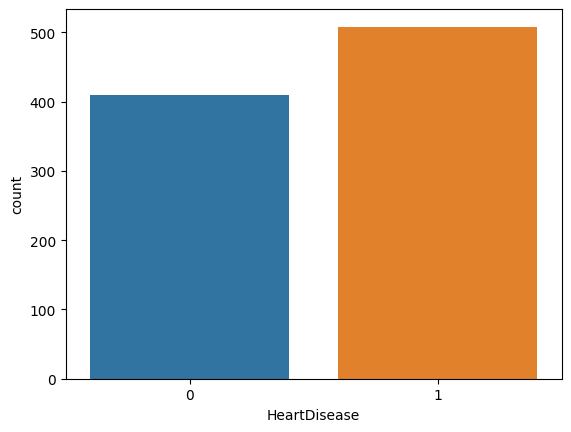

In [5]:
y=df['HeartDisease']
plot_sb = sns.countplot(df,x=y, label='Total')
Rain, NotRain =y.value_counts()
print('Have Heart Disease: ',Rain)
print('Not Have Heart Disease : ',NotRain)

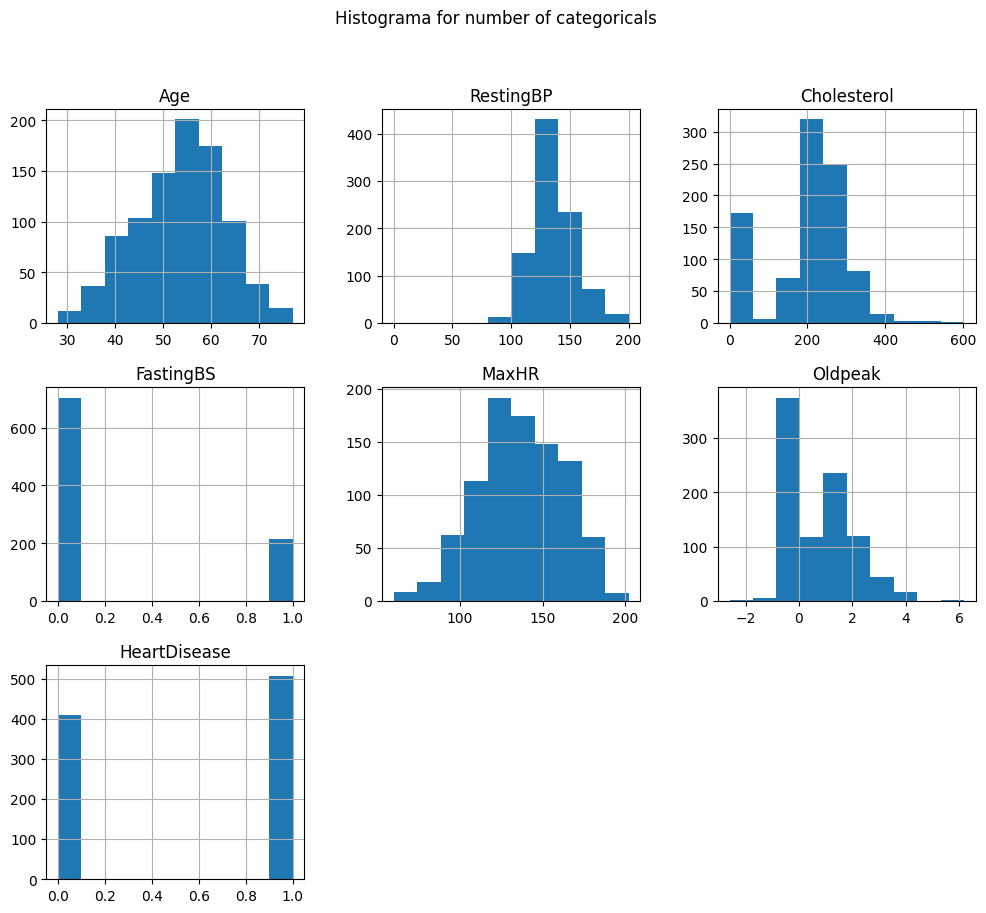

In [6]:
df.hist(figsize=(12, 10))
plt.suptitle('Histograma for number of categoricals')
plt.show()

# Preprocessing

In [7]:
sex=LabelEncoder()
cpt=LabelEncoder()
recg=LabelEncoder()
ea=LabelEncoder()
st=LabelEncoder()

In [8]:
df['Sex']=sex.fit_transform(df['Sex'])
df['ChestPainType']=cpt.fit_transform(df['ChestPainType'])
df['RestingECG']=recg.fit_transform(df['RestingECG'])
df['ExerciseAngina']=ea.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=st.fit_transform(df['ST_Slope'])

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: >

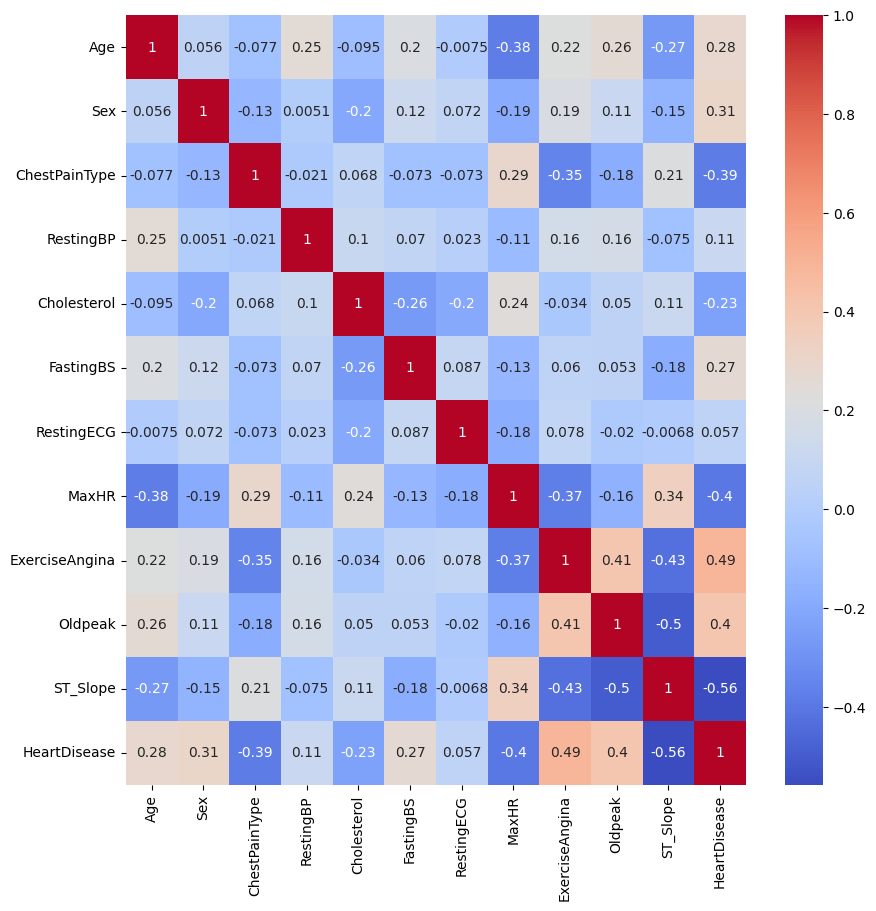

In [10]:
corr_matrix=df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [11]:
thresh_hold=0.2
select_feat=corr_matrix.index[abs(corr_matrix['HeartDisease'])>=thresh_hold].to_list()
select_feat.remove('HeartDisease')
print(select_feat)

['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [12]:
selected_features=df[select_feat]
selected_features.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289,0,172,0,0.0,2
1,49,0,2,180,0,156,0,1.0,1
2,37,1,1,283,0,98,0,0.0,2
3,48,0,0,214,0,108,1,1.5,1
4,54,1,2,195,0,122,0,0.0,2


In [13]:
target=df['HeartDisease']
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [14]:
scaler=StandardScaler()
selected_features=scaler.fit_transform(selected_features)
selected_features

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

# Splitting the Data

In [15]:
x_train,x_test,y_train,y_test=train_test_split(selected_features,target,test_size=0.2)

# Build Logistic Regression Model 

In [16]:
from sklearn.linear_model import LogisticRegression

LOG_model=LogisticRegression()
LOG_model.fit(x_train,y_train)

LogisticRegression()

In [17]:
log_pred=LOG_model.predict(x_test)

# Evaluate Logistic Regression Model

In [18]:
accuracy=accuracy_score(y_test,log_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 83 %


# Build XGBoost Model

In [19]:
from xgboost import XGBClassifier

XGB_model=XGBClassifier()
XGB_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
xgb_pred=XGB_model.predict(x_test)

# Evaluate XGBoost Model

In [21]:
accuracy=accuracy_score(y_test,xgb_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 82 %


# Build SVM Model

In [22]:
from sklearn.svm import SVC

SVM_model=SVC()
SVM_model.fit(x_train,y_train)

SVC()

In [23]:
svm_pred=SVM_model.predict(x_test)

# Evaluate SVM Model

In [24]:
accuracy=accuracy_score(y_test,svm_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 86 %


# Build KNN Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
knn_pred=KNN_model.predict(x_test)

# Evaluate KNN Model

In [27]:
accuracy=accuracy_score(y_test,knn_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 86 %


# Build Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

DTree_model=DecisionTreeClassifier()
DTree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
dtree_pred=DTree_model.predict(x_test)

# Evaluate Decision Tree Model

In [30]:
accuracy=accuracy_score(y_test,dtree_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 77 %


# Build NN Model

In [31]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([keras.layers.Dense(100,activation="relu"), keras.layers.Dense(2,activation="sigmoid")])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy"
              ,metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

2024-08-01 22:48:16.298145: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 22:48:16.298292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 22:48:16.467650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5458 - loss: 0.6789
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4538 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.4145 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3743 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.3626 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3280 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3470 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.3284 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.3586 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3585 


# Evaluate NN Model

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3298  


In [33]:
print('Accuracy =',int(test_acc*100),'%')


Accuracy = 85 %
